In [4]:
from google.colab import files
uploaded = files.upload()

Saving Titanic.csv to Titanic.csv


In [5]:
import pandas as pd

In [6]:
data = pd.read_csv("Titanic.csv")
data

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


In [7]:
!pip install mlxtend


In [8]:
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

In [12]:
titanic = pd.read_csv("Titanic.csv") # Replace pd.read_scsv with pd.read_csv
titanic

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Gender    2201 non-null   object
 2   Age       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


observations


*  All columns are object data type and categorical in nature

*  There are no null values
*  As the columns are categorical, we can adopt one-hot-encoding




<BarContainer object of 4 artists>

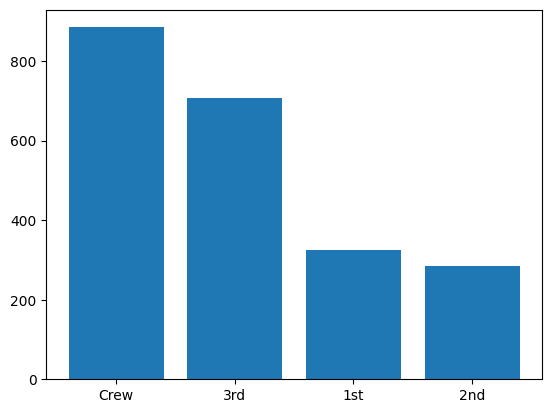

In [14]:
counts  = titanic['Class'].value_counts()
plt.bar(counts.index, counts.values)

In [15]:
df = pd.get_dummies(titanic,dtype=int)
df.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Class_1st      2201 non-null   int64
 1   Class_2nd      2201 non-null   int64
 2   Class_3rd      2201 non-null   int64
 3   Class_Crew     2201 non-null   int64
 4   Gender_Female  2201 non-null   int64
 5   Gender_Male    2201 non-null   int64
 6   Age_Adult      2201 non-null   int64
 7   Age_Child      2201 non-null   int64
 8   Survived_No    2201 non-null   int64
 9   Survived_Yes   2201 non-null   int64
dtypes: int64(10)
memory usage: 172.1 KB


In [17]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True, max_len=None)
frequent_itemsets

,support,itemsets
0,0.786461,(Gender_Male)
1,0.950477,(Age_Adult)
2,0.676965,(Survived_No)
3,0.757383,"(Gender_Male, Age_Adult)"
4,0.619718,"(Gender_Male, Survived_No)"
5,0.653339,"(Survived_No, Age_Adult)"
6,0.603816,"(Gender_Male, Survived_No, Age_Adult)"


In [24]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,1.0,0.009870,1.339441,0.061028,0.773191,0.253420,0.879936
1,(Age_Adult),(Gender_Male),0.950477,0.786461,0.757383,0.796845,1.013204,1.0,0.009870,1.051116,0.263149,0.773191,0.048630,0.879936
2,(Gender_Male),(Survived_No),0.786461,0.676965,0.619718,0.787984,1.163995,1.0,0.087312,1.523634,0.659783,0.734518,0.343674,0.851710
3,(Survived_No),(Gender_Male),0.676965,0.786461,0.619718,0.915436,1.163995,1.0,0.087312,2.525187,0.436144,0.734518,0.603990,0.851710
4,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,1.0,0.009900,1.419023,0.046906,0.670709,0.295290,0.826241
5,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,1.0,0.009900,1.033317,0.305968,0.670709,0.032243,0.826241
6,"(Gender_Male, Survived_No)",(Age_Adult),0.619718,0.950477,0.603816,0.974340,1.025106,1.0,0.014788,1.929980,0.064404,0.624824,0.481860,0.804809
7,"(Gender_Male, Age_Adult)",(Survived_No),0.757383,0.676965,0.603816,0.797241,1.177669,1.0,0.091095,1.593193,0.621823,0.727024,0.372330,0.844593
8,"(Survived_No, Age_Adult)",(Gender_Male),0.653339,0.786461,0.603816,0.924200,1.175139,1.0,0.089991,2.817152,0.429921,0.722283,0.645032,0.845982
9,(Gender_Male),"(Survived_No, Age_Adult)",0.786461,0.653339,0.603816,0.767764,1.175139,1.0,0.089991,1.492710,0.697935,0.722283,0.330078,0.845982


In [25]:
rules.sort_values (by='lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
7,"(Gender_Male, Age_Adult)",(Survived_No),0.757383,0.676965,0.603816,0.797241,1.177669,1.0,0.091095,1.593193,0.621823,0.727024,0.372330,0.844593
10,(Survived_No),"(Gender_Male, Age_Adult)",0.676965,0.757383,0.603816,0.891946,1.177669,1.0,0.091095,2.245337,0.467023,0.727024,0.554633,0.844593
8,"(Survived_No, Age_Adult)",(Gender_Male),0.653339,0.786461,0.603816,0.924200,1.175139,1.0,0.089991,2.817152,0.429921,0.722283,0.645032,0.845982
9,(Gender_Male),"(Survived_No, Age_Adult)",0.786461,0.653339,0.603816,0.767764,1.175139,1.0,0.089991,1.492710,0.697935,0.722283,0.330078,0.845982
2,(Gender_Male),(Survived_No),0.786461,0.676965,0.619718,0.787984,1.163995,1.0,0.087312,1.523634,0.659783,0.734518,0.343674,0.851710
3,(Survived_No),(Gender_Male),0.676965,0.786461,0.619718,0.915436,1.163995,1.0,0.087312,2.525187,0.436144,0.734518,0.603990,0.851710
6,"(Gender_Male, Survived_No)",(Age_Adult),0.619718,0.950477,0.603816,0.974340,1.025106,1.0,0.014788,1.929980,0.064404,0.624824,0.481860,0.804809
11,(Age_Adult),"(Gender_Male, Survived_No)",0.950477,0.619718,0.603816,0.635277,1.025106,1.0,0.014788,1.042660,0.494550,0.624824,0.040914,0.804809
4,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,1.0,0.009900,1.419023,0.046906,0.670709,0.295290,0.826241
5,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,1.0,0.009900,1.033317,0.305968,0.670709,0.032243,0.826241


conlusion




*   Adult Females travelling 1st class were among the most survived







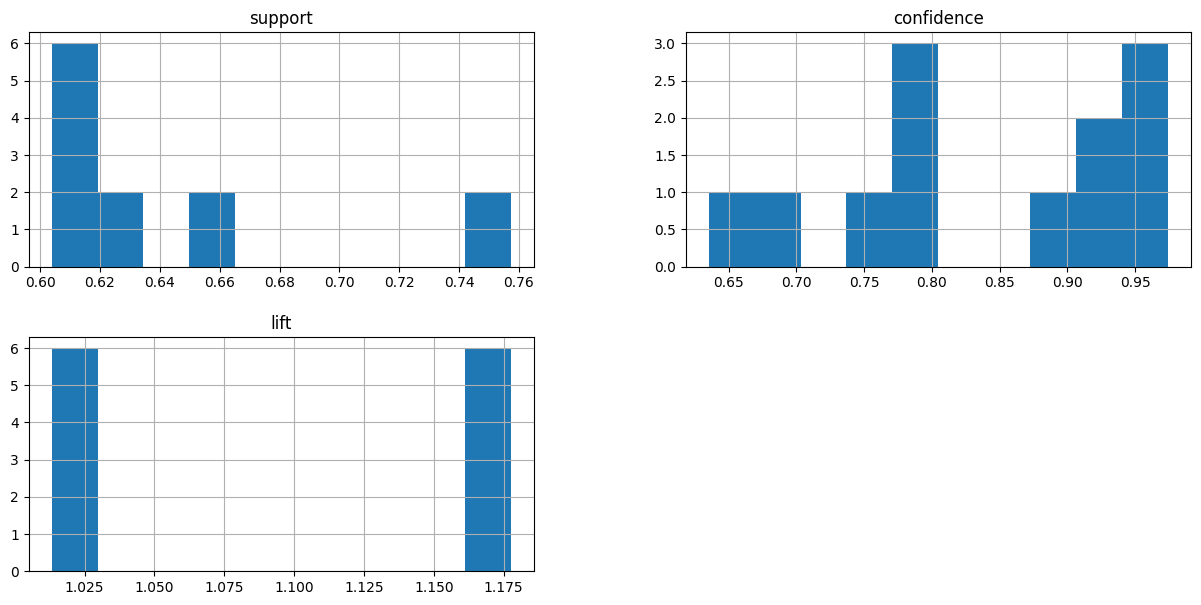

In [26]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

OBSERVATION


*  
*   List item



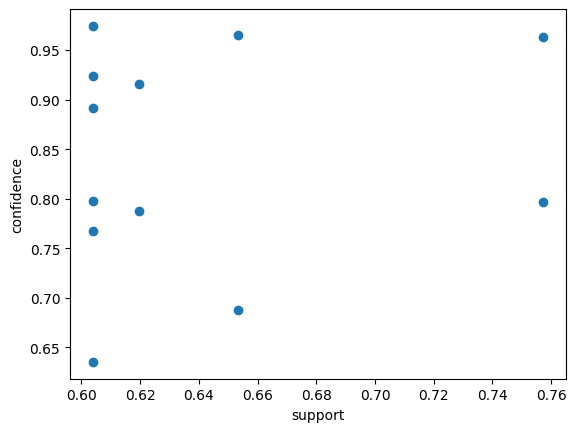

In [30]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel("support")
plt.ylabel("confidence")
plt.show()




* The confidence value is increasing with increase in support for most




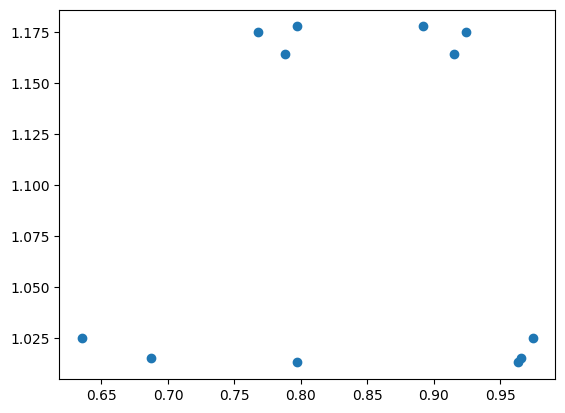

In [31]:
plt.scatter(rules['confidence'], rules['lift'])
plt.show()

In [34]:
rules[rules["consequents"]== ({"Survived_Yes"})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
